In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns

from subprocess import check_output

from matplotlib import pyplot as plt
%matplotlib inline

#For plotting
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches

# vg_cleaned.loc[:,'User_Score'] = vg_cleaned.loc[:,'User_Score'].convert_objects(convert_numeric=True);

Load the Data

In [2]:
vg_df = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')
vg_cleaned = vg_df.dropna(axis=0, how='any')

Sales vs Number of Releases

In [3]:
#Group the entries by year, then get how many entries are there; i.e. the number of releases
temp1 = vg_cleaned.groupby(['Year_of_Release']).count()
temp1 = temp1.reset_index()

In [4]:
#Do the same, but sum the values to get the total values of everything by year.
temp2 = vg_cleaned.groupby(['Year_of_Release']).sum()
temp2 = temp2.reset_index()

In [5]:
#Normalize the data, i.e. zero mean and unit std. We did this to be able to compare the shapes of both graphs, since 
#they have different ranges
normalised_df = pd.DataFrame()

normalised_df['release_count'] = temp1['Name']
normalised_df['global_sales'] = temp2['Global_Sales']
normalised_df = (normalised_df - normalised_df.mean()) / normalised_df.std()#(normalised_df.max() - normalised_df.min()) 
normalised_df['year'] = temp1['Year_of_Release']

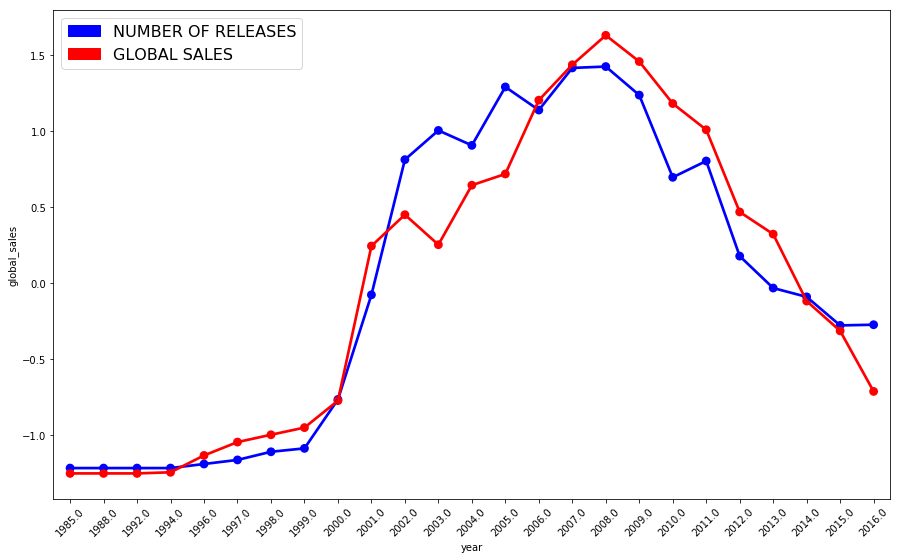

In [6]:
#Plot
plt.figure(figsize=(15, 9))
ax = sns.pointplot(x = normalised_df.year, y = normalised_df.release_count, color = 'blue', label='Release Count')
ax = sns.pointplot(x = normalised_df.year, y = normalised_df.global_sales, color = 'red', label='Global Sales')

blue_patch = mpatches.Patch(color='blue', label='NUMBER OF RELEASES')
red_patch = mpatches.Patch(color='red', label='GLOBAL SALES')
plt.legend(handles=[blue_patch, red_patch], loc='upper left', fontsize = 16)

plt.xticks(rotation=45);

The shapes follow each other well, there wasn't too much sales with little releases or vice versa. The other thing to note is that the number of releases is smoother than the sales, which seem to harder to accurately predict.

Genre Sales Evolution

These are two plots, the first is an area plot to see the precentage of sales of each genre over the years. The second is the sales by year (Although still divided by genre). This last one is just for convenience, to remember how the games sales were.

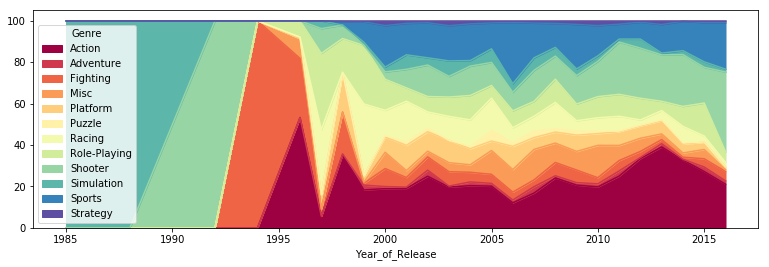

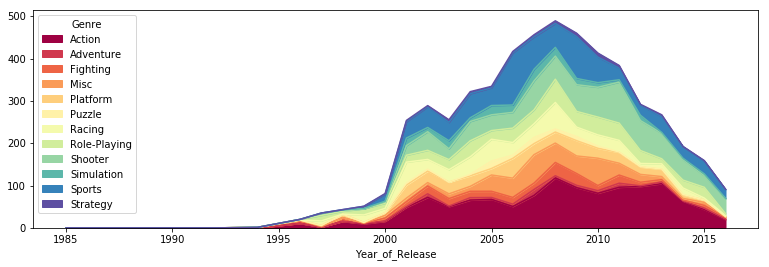

In [7]:
fig = plt.figure(figsize=(10, 8))

genre_sales_percentages_by_year = (vg_cleaned.groupby(['Year_of_Release', 'Genre']).Global_Sales.sum())*(100)/vg_cleaned.groupby(['Year_of_Release']).Global_Sales.sum()
genre_sales_percentages_by_year.unstack().plot(kind='area',stacked=True, colormap= 'Spectral', grid=False, figsize=(13, 4))

yearlySales = vg_cleaned.groupby(['Year_of_Release','Genre']).Global_Sales.sum()
yearlySales.unstack().plot(kind='area',stacked=True, colormap= 'Spectral', figsize=(13, 4) ) ;

The "action" genre is clearly what gamers are inclined to play the most. The interesting trend about it is that when the games sales started their decline around 2009, the "action" level remained almost the same. This genre may seem to be resistent to hard-hit markets.

Genre Total Sales

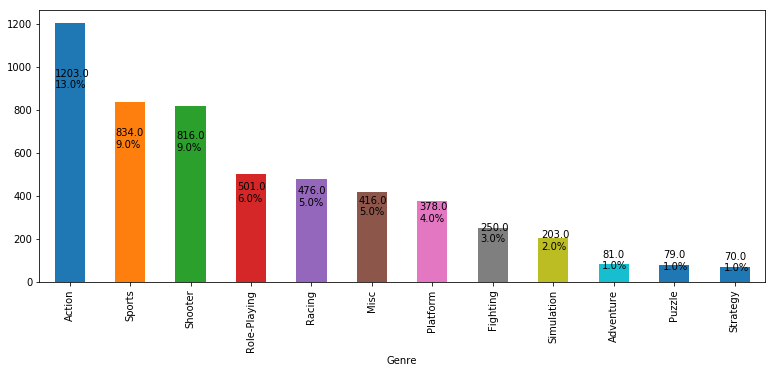

In [8]:
x = vg_cleaned.groupby(['Genre']).sum().copy()
ax = x.Global_Sales.sort_values(ascending=False).plot(kind='bar', figsize=(13, 5));

for p in ax.patches:
    ax.annotate(str( round( p.get_height() ) ) + "\n" + str(round( p.get_height() /89.170) )+ "%", 
                (p.get_x() * 1.007, p.get_height() * 0.75),
                color='black')

Although there are changes in ranking, there are no big surprises (By the number of releases, the rank was Action, Sports, Misc (Rank changed in sales), Role Playing, Shooter (Changed, sells more than it is released)..etc. 

But these changes in ranking are interesting to explore more. I want to see how different genres perform according to different metrics. The ones I chose are:
1) Number of Releases
2) Total Sales
3) Average Sales per Game

In [9]:
# 1 - number of releases per genre
# 2 - sales per genre
# 3 - average sales per game per genre

genre_difference_metric = [vg_cleaned.Genre.value_counts().index, vg_cleaned.groupby(['Genre']).sum().Global_Sales.sort_values(ascending=False).index, vg_cleaned.groupby(['Genre']).mean().Global_Sales.sort_values(ascending=False).index]

#Dataframe to be used for plotting.
genre_evolution_df = pd.DataFrame(columns=['genre', 'rank_type', 'rank'])

#Populate the dataframe
for metric in range(3):
    for genre in range(len(genre_difference_metric[metric])):
        genre_evolution_df = genre_evolution_df.append({'genre':genre_difference_metric[metric][genre], 'rank_type': metric, 'rank':genre},
                                   ignore_index=True)

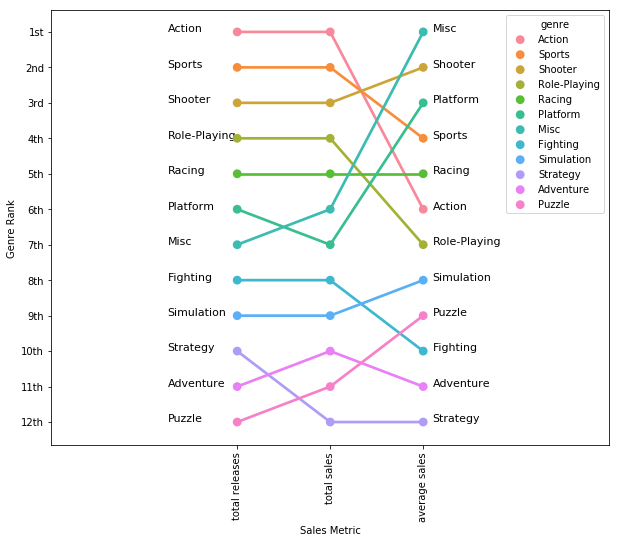

In [10]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)

sns.pointplot(x=genre_evolution_df.rank_type,
              y=12-genre_evolution_df['rank'], 
              hue=genre_evolution_df.genre)

for i in range(len(genre_difference_metric[0])):
    ax.text(-0.75, 12-i, genre_difference_metric[0][i], fontsize=11)
    ax.text(2.1, 12-i, genre_difference_metric[2][i], fontsize=11)
    
ax.set_xlim([-2,4])

xs = [0.0, 1.0, 2.0]
x_labels = ['total releases', 'total sales', 'average sales']
plt.xticks(xs, x_labels, rotation='vertical')

ax.set_xlabel('Sales Metric')

ys = range(1,13)
y_labels = ['12th', '11th', '10th', '9th', '8th', '7th', '6th', '5th', '4th', '3rd', '2nd', '1st']
plt.yticks(ys, y_labels)
ax.set_ylabel('Genre Rank')

plt.show();


Rating Sales Evolution

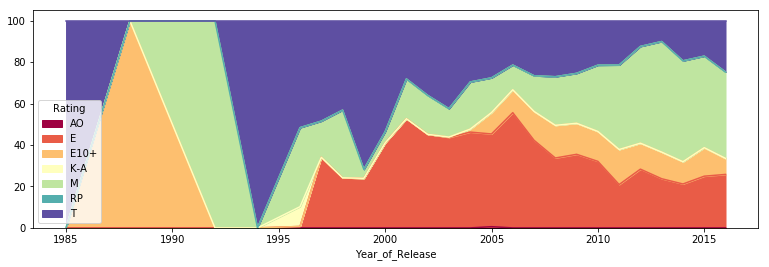

In [11]:
rating_sales_percentages_by_year = (vg_cleaned.groupby(['Year_of_Release', 'Rating']).Global_Sales.sum())*(100)/vg_cleaned.groupby(['Year_of_Release']).Global_Sales.sum()

rating_sales_percentages_by_year.unstack().plot(kind='area',stacked=True, colormap= 'Spectral', figsize=(13, 4));

Scores

Critic vs User Scores

C:\Users\Marija\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.
C:\Users\Marija\AppData\Roaming\Python\Python36\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


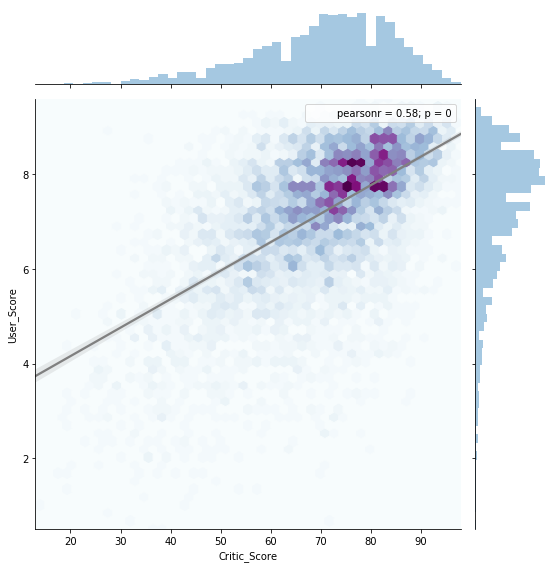

In [12]:
vg_cleaned.loc[:,'User_Score'] = vg_cleaned.loc[:,'User_Score'].convert_objects(convert_numeric=True);
g = sns.jointplot(x = 'Critic_Score', 
              y = 'User_Score',
              data = vg_cleaned, 
              kind = 'hex', 
              cmap = 'BuPu', 
              size = 8)

sns.regplot(vg_cleaned.Critic_Score, vg_cleaned.User_Score, ax=g.ax_joint, scatter=False, color='grey');

The user scores appear to be more generous than the critic one. But which one has a better correlation with the sales? From the first graph, we can see that, clearly, the critic score correlates better with the sales. In fact, the user score does not correlate at all with the sales, it floats around the zero! (Except for the sales in Japan, but still a lower correlation than the critic's one)

Regional Sales

Scatterplot between Global Sales and Regional Sales

In [13]:
sales_cols = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
sales_normalised_df = vg_cleaned[sales_cols].apply(lambda x: (x - x.mean()) / (x.max() - x.min()))

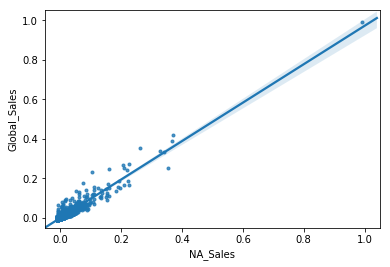

In [14]:
sns.regplot(x = sales_normalised_df.NA_Sales, y = sales_normalised_df.Global_Sales, marker=".")

plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)
fig.tight_layout();

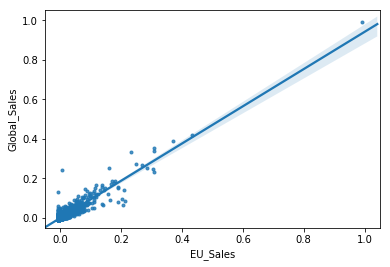

In [15]:
sns.regplot(x = sales_normalised_df.EU_Sales, y = sales_normalised_df.Global_Sales, marker=".")

plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)
fig.tight_layout();

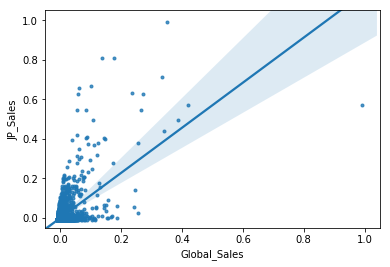

In [16]:
sns.regplot(x = sales_normalised_df.Global_Sales, y = sales_normalised_df.JP_Sales,    marker=".")

plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)
fig.tight_layout();

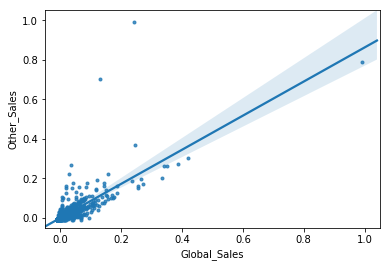

In [17]:
sns.regplot(x = sales_normalised_df.Global_Sales, y = sales_normalised_df.Other_Sales, marker=".")

plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)
fig.tight_layout();

Regional Sales of Genres

In [18]:
genre_geo_rankings = [vg_cleaned.groupby('Genre').sum().unstack().NA_Sales.sort_values(ascending=False).index, 
                      vg_cleaned.groupby('Genre').sum().unstack().EU_Sales.sort_values(ascending=False).index,
                      vg_cleaned.groupby('Genre').sum().unstack().Other_Sales.sort_values(ascending=False).index,
                      vg_cleaned.groupby('Genre').sum().unstack().JP_Sales.sort_values(ascending=False).index 
                      ]

In [19]:
# 1 - number of releases per genre
# 2 - sales per genre
# 3 - average sales per game per genre
genre_geo_rank_df = pd.DataFrame(columns=['genre', 'rank_type', 'rank'])

#for metric in genre_difference_metric:
for region in range(4):
    for genre in range(len(genre_geo_rankings[region])):
        genre_geo_rank_df = genre_geo_rank_df.append({'genre':genre_geo_rankings[region][genre], 'rank_type': region, 'rank':genre},
                                   ignore_index=True)

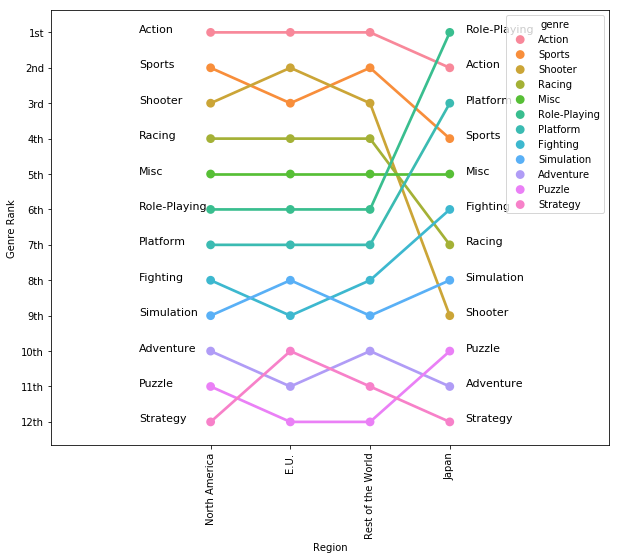

In [20]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)

sns.pointplot(x=genre_geo_rank_df.rank_type,
              y=12-genre_geo_rank_df['rank'], 
              hue=genre_geo_rank_df.genre)

for i in range(len(genre_geo_rankings[0])):
    ax.text(-0.9, 12-i, genre_geo_rankings[0][i], fontsize=11)
    ax.text(3.2, 12-i, genre_geo_rankings[3][i], fontsize=11)
    
ax.set_xlim([-2,5])

xs = [0.0, 1.0, 2.0, 3.0]
x_labels = ['North America', 'E.U.', 'Rest of the World', 'Japan']
plt.xticks(xs, x_labels, rotation='vertical')
ax.set_xlabel('Region')

ys = range(1,13)
y_labels = ['12th', '11th', '10th', '9th', '8th', '7th', '6th', '5th', '4th', '3rd', '2nd', '1st']
plt.yticks(ys, y_labels)
ax.set_ylabel('Genre Rank')

plt.show();


We think that there are a lot of insights from this graph. Mainly, the taste of gamers in Japan is really different than that of the three other regions. The remaining three regions are, more or less, similar; with maybe only platform and racing genres moving more than one position between the three regions.

Most Selling Platform Each Year

We will plot the top selling platform timeline. In the beginning the plot had all the platforms sales, but the result had too much information to digest, it was too clutered. The graph is followed by a table that describes the same thing, just for convenience.

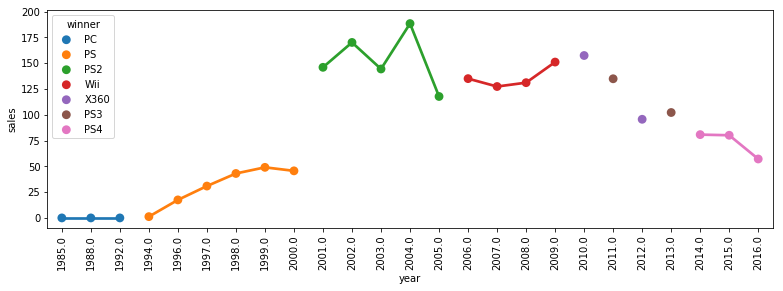

In [21]:
#temp is the sum of all variables for each platform by year
temp = vg_cleaned.groupby(['Year_of_Release', 'Platform']).sum().reset_index().groupby('Year_of_Release')

platform_yearly_winner_df = pd.DataFrame()

for year, group in temp:
    current_year = temp.get_group(year)
    this_year_max_sales = 0.0
    current_year_winner = ""
    row = {'year':"", 'winner':"", 'sales':""}
    for index, platform_data in current_year.iterrows():
        if platform_data.Global_Sales > this_year_max_sales:
            this_year_max_sales = platform_data.Global_Sales
            current_year_winner = platform_data.Platform
    
    row['year'] = year
    row['winner'] = current_year_winner
    row['sales'] = this_year_max_sales
    platform_yearly_winner_df = platform_yearly_winner_df.append(row, ignore_index=True)

fig = plt.figure(figsize=(13, 4))

g = sns.pointplot(x = platform_yearly_winner_df.year ,
              y = platform_yearly_winner_df.sales , 
              hue = platform_yearly_winner_df.winner);

g.set_xticklabels(g.get_xticklabels(), rotation=90);

In [22]:
# platform_yearly_winner_df.set_index('year', inplace=True) NEKJEEEEEEEEEE

Publishers

Top Publishers of all Time

When thinking about what the term "top publisher" means, We think it has no simple answer. So we have decided to explore the matter from different points of view, and see if there are certain names that consistantly appear in all the points of view.

By Sales

In [23]:
x = vg_cleaned.groupby(['Publisher']).sum().Global_Sales.copy()
x.sort_values(ascending=False, inplace=True)
x.head(10)

Publisher
Electronic Arts                 868.55
Nintendo                        849.49
Activision                      535.74
Sony Computer Entertainment     388.10
Take-Two Interactive            350.17
Ubisoft                         340.23
Microsoft Game Studios          216.49
THQ                             162.87
Sega                            148.42
Konami Digital Entertainment    137.87
Name: Global_Sales, dtype: float64

By Number of Releases

In [24]:
x = vg_cleaned.groupby(['Publisher']).count().Name.copy()
x.sort_values(ascending=False, inplace=True)
x.head(10)

Publisher
Electronic Arts                 944
Ubisoft                         496
Activision                      492
Sony Computer Entertainment     316
THQ                             307
Nintendo                        291
Sega                            284
Take-Two Interactive            273
Konami Digital Entertainment    244
Namco Bandai Games              239
Name: Name, dtype: int64

The interesting part is that the publishers who made it to the top 10 in both lists are the same, with just a different ordering.

By Average Yearly Earning

In [25]:
vg_cleaned.groupby(['Publisher', 'Year_of_Release'], as_index=False).mean().groupby('Publisher').mean().Global_Sales.sort_values(ascending=False).head(10)

Publisher
SquareSoft                            2.976000
GT Interactive                        2.833333
Nintendo                              2.755518
RedOctane                             2.485000
Hello Games                           1.700000
Valve                                 1.700000
Microsoft Game Studios                1.657761
Sony Computer Entertainment Europe    1.637429
Sony Computer Entertainment           1.626926
Take-Two Interactive                  1.579975
Name: Global_Sales, dtype: float64

There was something that intuitively we didn't like about this last list. After some investigation, we found that there were some publishers who did not stay in the market for long, but had made some strong sales. We are not sure if this makes a publisher make it towards the top list of all time, but we have decided to add the condition that a top publisher must have been in the competition for more than 5 years. We are not sure if we are subconsciously pushing some names to reappear into this again, maybe because that makes it clearer who deserves to be on that list.

In [26]:
vg_cleaned.groupby(['Publisher']).filter(lambda x: len(x) > 5).groupby(['Publisher', 'Year_of_Release'], as_index=False).mean().groupby('Publisher').mean().Global_Sales.sort_values(ascending=False).head(10)

Publisher
SquareSoft                            2.976000
Nintendo                              2.755518
Microsoft Game Studios                1.657761
Sony Computer Entertainment Europe    1.637429
Sony Computer Entertainment           1.626926
Take-Two Interactive                  1.579975
Universal Interactive                 1.382222
Activision                            1.337119
Virgin Interactive                    1.281000
Bethesda Softworks                    1.244710
Name: Global_Sales, dtype: float64

Still, some new names reappeared. But we are satisfied with the 5 years condition, so we are going to continue with this last list.

By Average Earning per Game

In [27]:
x = vg_cleaned.groupby(['Publisher']).mean().Global_Sales.copy()
x.sort_values(ascending=False, inplace=True)
x.head(10)

Publisher
Nintendo                              2.919210
GT Interactive                        2.833333
SquareSoft                            2.764444
RedOctane                             2.170000
Valve                                 1.700000
Hello Games                           1.700000
Bethesda Softworks                    1.539130
Microsoft Game Studios                1.535390
Sony Computer Entertainment Europe    1.528182
Hasbro Interactive                    1.430000
Name: Global_Sales, dtype: float64

Again, the same dilemma of publishers with little publishings making great sales and reappearing on the top list. This time, we are setting a condition of having released at least 10 games before competing for the first places.


In [28]:
vg_cleaned.groupby(['Publisher']).filter(lambda x: len(x) > 10).groupby(['Publisher']).Global_Sales.mean().sort_values(ascending=False).head(10)

Publisher
Nintendo                              2.919210
Bethesda Softworks                    1.539130
Microsoft Game Studios                1.535390
Sony Computer Entertainment Europe    1.528182
Take-Two Interactive                  1.282674
Sony Computer Entertainment           1.228165
Activision                            1.088902
Virgin Interactive                    1.033158
LucasArts                             1.025571
Electronic Arts                       0.920074
Name: Global_Sales, dtype: float64

Top Publishers Final List

So the list of top publisher is the union of the top 10 highest sales, top 10 highest release, top 10 highest average sales for publishers who have released more than 10 games and top 10 highest average sales for publishers who have been around for over 5 years. The "over 10 games" and "over 5 years" are just arbitrary values that seem reasonable to me, but feel free to experiment with these values (Change the value inside the lambda function within the filters)

In [29]:
top_publishers = ['Electronic Arts', 'Activision', 'Namco Bandai Games', 'Ubisoft', 'Konami Digital Entertainment', \
                  'THQ', 'Nintendo', 'Sony Computer Entertainment', 'Sega', 'Take-Two Interactive',
                  'Sony Computer Entertainment Europe', 'Microsoft Game Studios', 'Enix Corporation', 'Bethesda Softworks', 'SquareSoft'\
                  'Take-Two Interactive', 'LucasArts', '989 Studios', 'Hasbro Interactive', 'Universal Interactive']

In [33]:
top_publisher_df = vg_cleaned[vg_cleaned['Publisher'].isin(top_publishers)]

How do these top publishers make-up of the gaming market?

Number of releases

In [34]:
print("They make", 100*top_publisher_df.shape[0]/float(vg_cleaned.shape[0]),"% of the number of releases in this dataset")

They make 61.201465201465204 % of the number of releases in this dataset


Total Sales

In [35]:
total_games_sales = vg_cleaned.Global_Sales.sum()
top_publisher_total_sales = top_publisher_df.Global_Sales.sum()

print("Total Video Games Sales:", total_games_sales, "Million US$")
print("Total Top Publishers Sales:", top_publisher_total_sales, "Million US$")
print("They make ", 100*top_publisher_total_sales/total_games_sales,"% of the total video games sales")

Total Video Games Sales: 5307.05 Million US$
Total Top Publishers Sales: 4295.13 Million US$
They make  80.93253313987996 % of the total video games sales


Favorite Genre for Each Top Publisher

In [36]:
x = top_publisher_df.groupby(['Publisher', 'Genre']).count().copy()
x.unstack().Name.idxmax(axis=1)

Publisher
Activision                                  Action
Bethesda Softworks                         Shooter
Electronic Arts                             Sports
Enix Corporation                      Role-Playing
Hasbro Interactive                          Action
Konami Digital Entertainment                Action
LucasArts                                   Action
Microsoft Game Studios                     Shooter
Namco Bandai Games                        Fighting
Nintendo                              Role-Playing
Sega                                        Action
Sony Computer Entertainment                 Sports
Sony Computer Entertainment Europe        Platform
THQ                                         Action
Take-Two Interactive                        Sports
Ubisoft                                     Action
Universal Interactive                     Platform
dtype: object

By Sales

In [37]:
x = top_publisher_df.groupby(['Publisher', 'Genre']).sum().copy()
x.unstack().Global_Sales.idxmax(axis=1)

Publisher
Activision                                 Shooter
Bethesda Softworks                    Role-Playing
Electronic Arts                             Sports
Enix Corporation                      Role-Playing
Hasbro Interactive                          Action
Konami Digital Entertainment                Action
LucasArts                                   Action
Microsoft Game Studios                     Shooter
Namco Bandai Games                        Fighting
Nintendo                                    Sports
Sega                                      Platform
Sony Computer Entertainment                 Racing
Sony Computer Entertainment Europe          Action
THQ                                         Action
Take-Two Interactive                        Action
Ubisoft                                     Action
Universal Interactive                     Platform
dtype: object

Top Genre Producer

By Number of Games Released

In [38]:
x = top_publisher_df.groupby(['Genre', 'Publisher']).count().copy()
x.unstack().Name.idxmax(axis=1)

Genre
Action                  Activision
Adventure                  Ubisoft
Fighting        Namco Bandai Games
Misc                    Activision
Platform                  Nintendo
Puzzle                    Nintendo
Racing             Electronic Arts
Role-Playing    Namco Bandai Games
Shooter            Electronic Arts
Simulation         Electronic Arts
Sports             Electronic Arts
Strategy                       THQ
dtype: object

By Sales

In [39]:
x = top_publisher_df.groupby(['Genre', 'Publisher']).sum().copy()
x.unstack().Global_Sales.idxmax(axis=1)

Genre
Action          Take-Two Interactive
Adventure                    Ubisoft
Fighting          Namco Bandai Games
Misc                        Nintendo
Platform                    Nintendo
Puzzle                      Nintendo
Racing               Electronic Arts
Role-Playing                Nintendo
Shooter                   Activision
Simulation           Electronic Arts
Sports               Electronic Arts
Strategy                  Activision
dtype: object

By Average Sales per game

In [40]:
x = top_publisher_df.groupby(['Genre', 'Publisher']).mean().copy()
x.unstack().Global_Sales.idxmax(axis=1)

Genre
Action          Sony Computer Entertainment Europe
Adventure                     Take-Two Interactive
Fighting                                  Nintendo
Misc                                      Nintendo
Platform                                  Nintendo
Puzzle                                    Nintendo
Racing                                    Nintendo
Role-Playing                    Bethesda Softworks
Shooter                     Microsoft Game Studios
Simulation                                Nintendo
Sports                                    Nintendo
Strategy                                Activision
dtype: object

Top Performers by Region

North America

Inside the bar, there will be the actual value of the total sales, followed by the publisher's share percentage of the sales in the region.

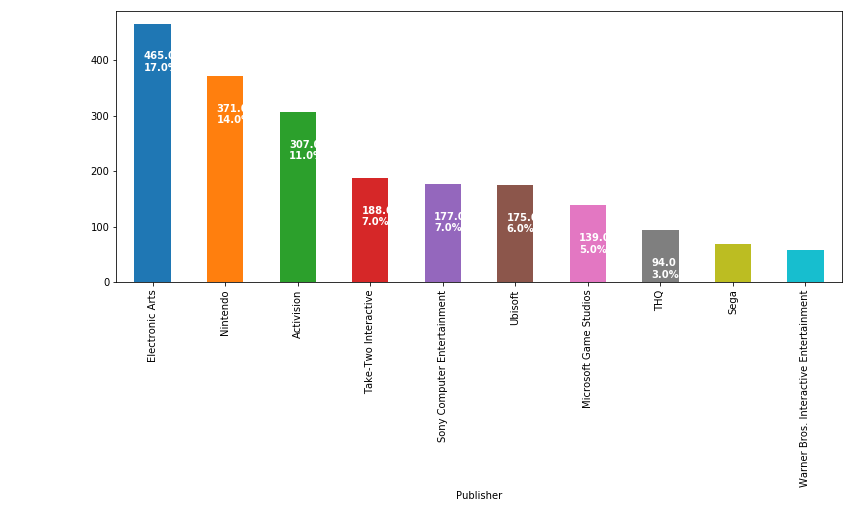

In [44]:
ax = vg_cleaned.groupby('Publisher').sum().unstack().NA_Sales.sort_values(ascending=False).head(10).plot(kind='bar', figsize=(13, 5));

for p in ax.patches:
    ax.annotate(str( round( p.get_height() ) ) + "\n" + str(round( 100.0* p.get_height() /vg_cleaned.NA_Sales.sum()) )+ "%", 
                (p.get_x() + 0.13, p.get_height()-85),
                color='white', fontsize=10, fontweight='bold')

European Union

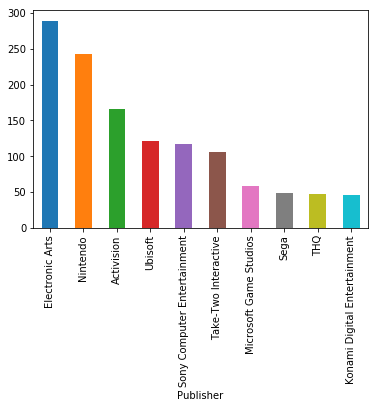

In [45]:
vg_cleaned.groupby('Publisher').sum().unstack().EU_Sales.sort_values(ascending=False).head(10).plot(kind='bar');

Japan

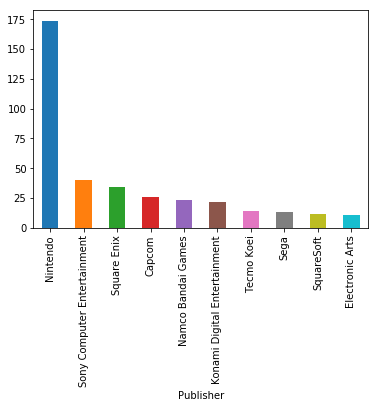

In [46]:
vg_cleaned.groupby('Publisher').sum().unstack().JP_Sales.sort_values(ascending=False).head(10).plot(kind='bar');

Rest of the World

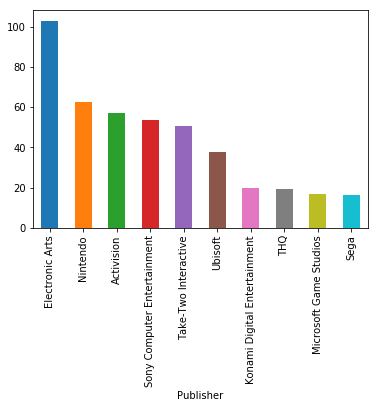

In [47]:
vg_cleaned.groupby('Publisher').sum().unstack().Other_Sales.sort_values(ascending=False).head(10).plot(kind='bar');

The pattern is similar in North America, E.U. and rest of the world. Again, Japan stands out as a region with its own peculiarities.

Genre

North America

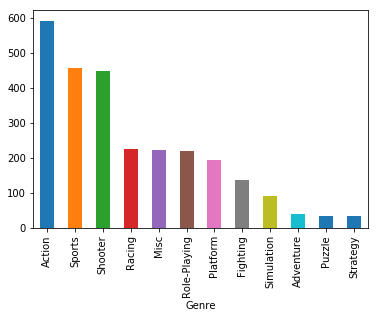

In [48]:
vg_cleaned.groupby('Genre').sum().unstack().NA_Sales.sort_values(ascending=False).plot(kind='bar');

European Union

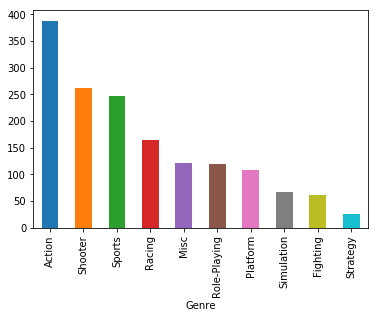

In [49]:
vg_cleaned.groupby('Genre').sum().unstack().EU_Sales.sort_values(ascending=False).head(10).plot(kind='bar');

Japan

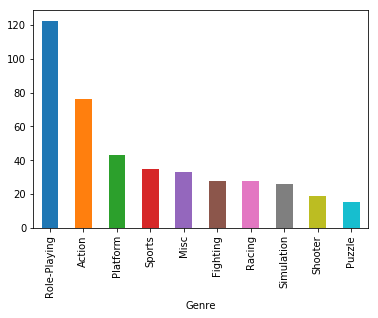

In [50]:
vg_cleaned.groupby('Genre').sum().unstack().JP_Sales.sort_values(ascending=False).head(10).plot(kind='bar');

We knew already that the Japanese taste for games was already different, but when we quantified the sales it showed an even more interesting insight: their games are dominated by the role-playing genre!

Rest of the World

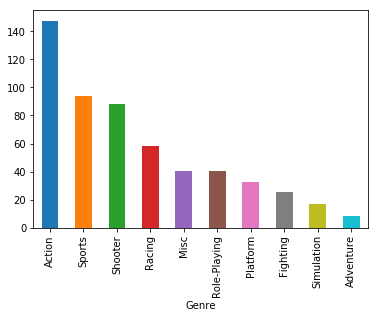

In [51]:
vg_cleaned.groupby('Genre').sum().unstack().Other_Sales.sort_values(ascending=False).head(10).plot(kind='bar');

Honourable Mentions

Most Profitable Games of all Time

In [52]:
vg_cleaned.sort_values('Global_Sales', ascending=False).head(10).Name

0                    Wii Sports
2                Mario Kart Wii
3             Wii Sports Resort
6         New Super Mario Bros.
7                      Wii Play
8     New Super Mario Bros. Wii
11                Mario Kart DS
13                      Wii Fit
14           Kinect Adventures!
15                 Wii Fit Plus
Name: Name, dtype: object

Most Profitable Games in each Genre

In [53]:
#There are games with duplicate names (For each platform for example), so let's deal with this
x = vg_cleaned.groupby(['Genre', 'Name']).sum().reset_index().groupby('Genre')

#A dataframe that will hold rankings, for nice display
best_selling_titles_by_genre_df = pd.DataFrame()

for name, group in x:
    temp_col = group.sort_values('Global_Sales', ascending=False).head(10).Name.reset_index(drop=True)
    best_selling_titles_by_genre_df[name] = temp_col

In [54]:
best_selling_titles_by_genre_df

,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
0,Grand Theft Auto V,Assassin's Creed,Super Smash Bros. Brawl,Wii Play,New Super Mario Bros.,Brain Age 2: More Training in Minutes a Day,Mario Kart Wii,The Elder Scrolls V: Skyrim,Call of Duty: Modern Warfare 3,The Sims 3,Wii Sports,StarCraft II: Wings of Liberty
1,Grand Theft Auto: San Andreas,L.A. Noire,WWE SmackDown vs Raw 2008,Kinect Adventures!,New Super Mario Bros. Wii,Professor Layton and the Curious Village,Mario Kart DS,Fallout 4,Call of Duty: Black Ops II,Animal Crossing: Wild World,Wii Sports Resort,Halo Wars
2,Grand Theft Auto IV,Heavy Rain,Tekken 3,Brain Age: Train Your Brain in Minutes a Day,Super Mario Galaxy,Professor Layton and the Diabolical Box,Gran Turismo 3: A-Spec,Fallout 3,Call of Duty: Black Ops,Animal Crossing: New Leaf,Wii Fit,Sid Meier's Civilization Revolution
3,Grand Theft Auto: Vice City,Onimusha 2: Samurai's Destiny,Street Fighter IV,Guitar Hero III: Legends of Rock,Super Mario 3D Land,Professor Layton and the Unwound Future,Mario Kart 7,Final Fantasy VII,Call of Duty: Ghosts,Cooking Mama,Wii Fit Plus,XCOM: Enemy Unknown
4,LEGO Star Wars: The Complete Saga,Star Fox Adventures,Super Smash Bros. Melee,Just Dance 3,New Super Mario Bros. 2,Pac-Man Collection,Gran Turismo 4,Diablo III,Call of Duty: Modern Warfare 2,MySims,FIFA 14,Tom Clancy's EndWar
5,FIFA Soccer 13,Until Dawn,Tekken 2,Just Dance 2,LittleBigPlanet,WarioWare: Smooth Moves,Gran Turismo,Fallout: New Vegas,Call of Duty 4: Modern Warfare,Animal Crossing: City Folk,FIFA 16,Sid Meier's Civilization V
6,Grand Theft Auto III,Beyond: Two Souls,Mortal Kombat,Mario Party DS,Super Mario Galaxy 2,Professor Layton and the Last Specter,Gran Turismo 5,Final Fantasy X,Battlefield 3,The Sims 2,FIFA Soccer 11,StarCraft II: Heart of the Swarm
7,Assassin's Creed III,Rise of the Tomb Raider,Fight Night Round 3,Just Dance 4,Crash Bandicoot: The Wrath of Cortex,Mario vs. Donkey Kong: Mini-Land Mayhem!,Need for Speed Underground,Final Fantasy VIII,Call of Duty: World at War,The Sims 2: Pets,FIFA 17,Pikmin
8,Red Dead Redemption,Drawn To Life: SpongeBob SquarePants Edition,WWE SmackDown vs. Raw 2009,Wii Party,Crash Bandicoot 3: Warped,Tetris Worlds,Need for Speed Underground 2,The Elder Scrolls IV: Oblivion,Battlefield 4,The Sims: Unleashed,Madden NFL 07,Plants vs. Zombies
9,Assassin's Creed II,Avatar: The Last Airbender,SoulCalibur II,Mario Party 8,Donkey Kong Country Returns,Scribblenauts,Gran Turismo 2,Pokémon Platinum Version,Call of Duty: Advanced Warfare,The Sims,FIFA Soccer 09,Warcraft III: The Frozen Throne


My take over the best selling titles by genre:
1- GTA dominates the action genre
2- Wii sports stuff dominate the sports, followed by FIFAs
3- Call of Duty dominates the shooting genre.
4- The dataset need some cleaning, for example FIFA 2013 is listed as an action game while the rest of the FIFAs are listed as sports. Same for Assassin's Creed, some are listed as Action, others are adventure.

Conclusion

The sales and the number of releases go hand by hand, nothing special\suspicious.


The "Action" genre seems to be the most resistant to sales decline.


Genres seem to be reasonably persistent when we compare their number of releases and their revenues. However, when we add to the picture the average revenue per game, the rankings change a lot:

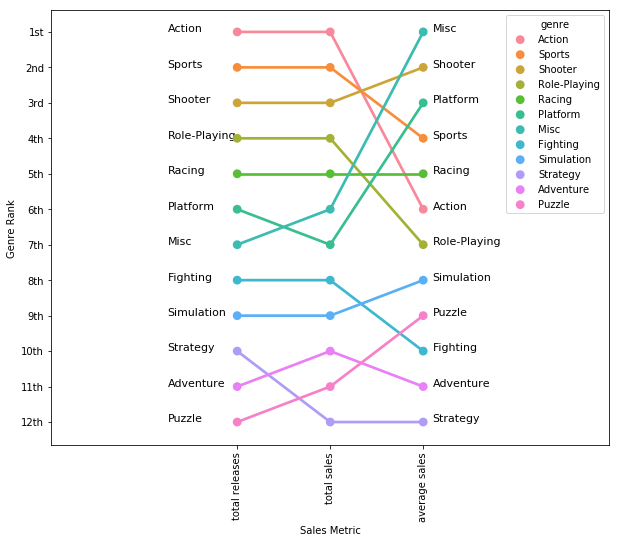

In [55]:
#First is the number of releases per genre, second is the sales per genre, third is the average sales per game per genre
genre_difference_metric = [vg_cleaned.Genre.value_counts().index, vg_cleaned.groupby(['Genre']).sum().Global_Sales.sort_values(ascending=False).index, vg_cleaned.groupby(['Genre']).mean().Global_Sales.sort_values(ascending=False).index]

#Dataframe to be used for plotting.
genre_evolution_df = pd.DataFrame(columns=['genre', 'rank_type', 'rank'])

#Populate the dataframe
for metric in range(3):
    for genre in range(len(genre_difference_metric[metric])):
        genre_evolution_df = genre_evolution_df.append({'genre':genre_difference_metric[metric][genre], 'rank_type': metric, 'rank':genre},
                                   ignore_index=True)

        
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)

sns.pointplot(x=genre_evolution_df.rank_type,
              y=12-genre_evolution_df['rank'], 
              hue=genre_evolution_df.genre)

for i in range(len(genre_difference_metric[0])):
    ax.text(-0.75, 12-i, genre_difference_metric[0][i], fontsize=11)
    ax.text(2.1, 12-i, genre_difference_metric[2][i], fontsize=11)
    
ax.set_xlim([-2,4])

xs = [0.0, 1.0, 2.0]
x_labels = ['total releases', 'total sales', 'average sales']
plt.xticks(xs, x_labels, rotation='vertical')

ax.set_xlabel('Sales Metric')

ys = range(1,13)
y_labels = ['12th', '11th', '10th', '9th', '8th', '7th', '6th', '5th', '4th', '3rd', '2nd', '1st']
plt.yticks(ys, y_labels)
ax.set_ylabel('Genre Rank')

plt.show();




The critic score is more conservative than the user score, but it correlates much better with the sales. In fact, user score does not correlate at all (coefficient almost equal zero) with the games sales:

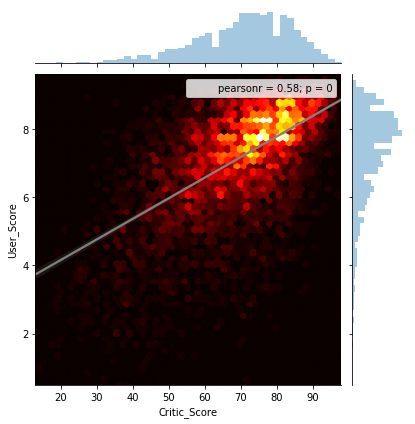

In [56]:
g = sns.jointplot(x = 'Critic_Score', 
              y = 'User_Score',
              data = vg_cleaned, 
              kind = 'hex', 
              cmap= 'hot', 
              size=6)

#http://stackoverflow.com/questions/33288830/how-to-plot-regression-line-on-hexbins-with-seaborn
sns.regplot(vg_cleaned.Critic_Score, vg_cleaned.User_Score, ax=g.ax_joint, scatter=False, color='grey');



Japan is a unique region when it comes to games. The rest of the world is more or less consistent, but Japan is different. For example, this is how the different genres sales ranked within each of the four regions:

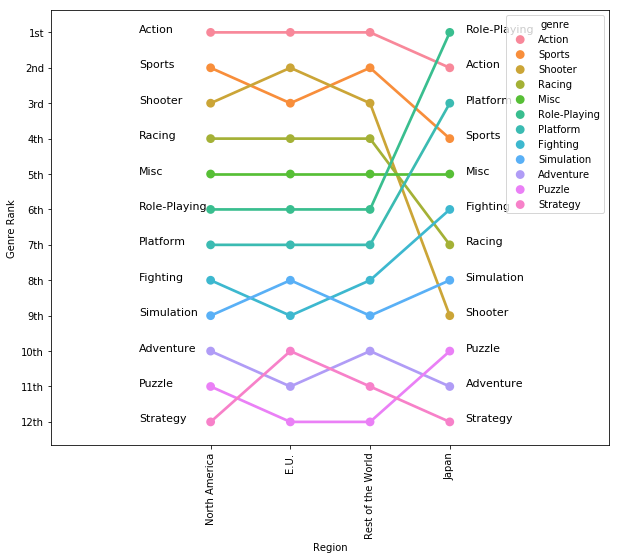

In [57]:
genre_geo_rankings = [vg_cleaned.groupby('Genre').sum().unstack().NA_Sales.sort_values(ascending=False).index, 
                      vg_cleaned.groupby('Genre').sum().unstack().EU_Sales.sort_values(ascending=False).index,
                      vg_cleaned.groupby('Genre').sum().unstack().Other_Sales.sort_values(ascending=False).index,
                      vg_cleaned.groupby('Genre').sum().unstack().JP_Sales.sort_values(ascending=False).index
                      ]

#First is the number of releases per genre, second is the sales per genre, third is the average sales per game per genre
genre_geo_rank_df = pd.DataFrame(columns=['genre', 'rank_type', 'rank'])

#for metric in genre_difference_metric:
for region in range(4):
    for genre in range(len(genre_geo_rankings[region])):
        genre_geo_rank_df = genre_geo_rank_df.append({'genre':genre_geo_rankings[region][genre], 'rank_type': region, 'rank':genre},
                                   ignore_index=True)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)

sns.pointplot(x=genre_geo_rank_df.rank_type,
              y=12-genre_geo_rank_df['rank'], 
              hue=genre_geo_rank_df.genre)

for i in range(len(genre_geo_rankings[0])):
    ax.text(-0.9, 12-i, genre_geo_rankings[0][i], fontsize=11)
    ax.text(3.2, 12-i, genre_geo_rankings[3][i], fontsize=11)
    
ax.set_xlim([-2,5])

xs = [0.0, 1.0, 2.0, 3.0]
x_labels = ['North America', 'E.U.', 'Rest of the World', 'Japan']
plt.xticks(xs, x_labels, rotation='vertical')
ax.set_xlabel('Region')

ys = range(1,13)
y_labels = ['12th', '11th', '10th', '9th', '8th', '7th', '6th', '5th', '4th', '3rd', '2nd', '1st']
plt.yticks(ys, y_labels)
ax.set_ylabel('Genre Rank')

plt.show();

The Japanese also showed a strong inclination to Nintendo as a publisher, and for the "Role Playing" genre.

The top publishers list is a list made of the top 20 publishers that consistently made it to the top 10 lists of different metrics (e.g. top selling games, top total sales..etc)


The top publishers are:
Electronic Arts
Activision
Namco Bandai Games
Ubisoft
Konami Digital Entertainment
THQ
Nintendo
Sony Computer Entertainment
Sega
Take-Two Interactive
Sony Computer Entertainment Europe
Microsoft Game Studios
Enix Corporation
Bethesda Softworks
SquareSoft
Take-Two Interactive
LucasArts
989 Studios
Hasbro Interactive
Universal Interactive

These 20 companies make up a little over half (51.85%) of all the games produced, and a little over three quarters (76%) of all the global sales. This follows the general pattern found everywhere in this dataset: the exponential decay.